In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK data (only needed once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

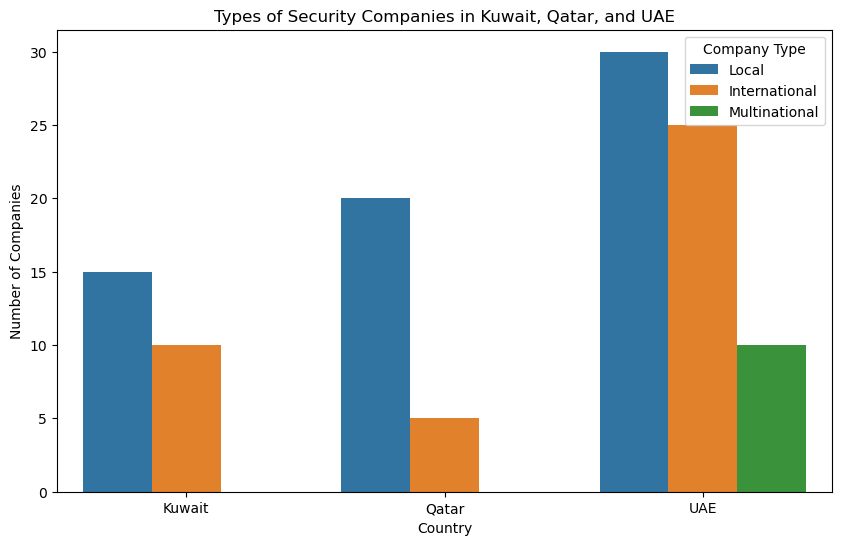

In [4]:
#step 2:Classify types of security companies
# Quantitative Data for Objective 1
data = {
    'Country': ['Kuwait', 'Kuwait', 'Qatar', 'Qatar', 'UAE', 'UAE', 'UAE'],
    'Company Type': ['Local', 'International', 'Local', 'International', 'Local', 'International', 'Multinational'],
    'Count': [15, 10, 20, 5, 30, 25, 10]
}

# Create DataFrame
df_security_companies = pd.DataFrame(data)

# Visualize the types of security companies by country
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', hue='Company Type', data=df_security_companies)
plt.title('Types of Security Companies in Kuwait, Qatar, and UAE')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.show()


=== Descriptive Statistics ===
Satisfaction Levels (%)
 Satisfaction Level
High      50.000000
Medium    33.333333
Low       16.666667
Name: proportion, dtype: float64

Cross-Tabulation: Satisfaction Level by Country
 Satisfaction Level  High  Low  Medium
Country                              
Kuwait                 1    0       1
Qatar                  0    1       1
UAE                    2    0       0

Correlation Matrix
                                    Perceived Professionalism  \
Perceived Professionalism                           1.000000   
Technology Integration Importance                   0.639602   

                                   Technology Integration Importance  
Perceived Professionalism                                   0.639602  
Technology Integration Importance                           1.000000  


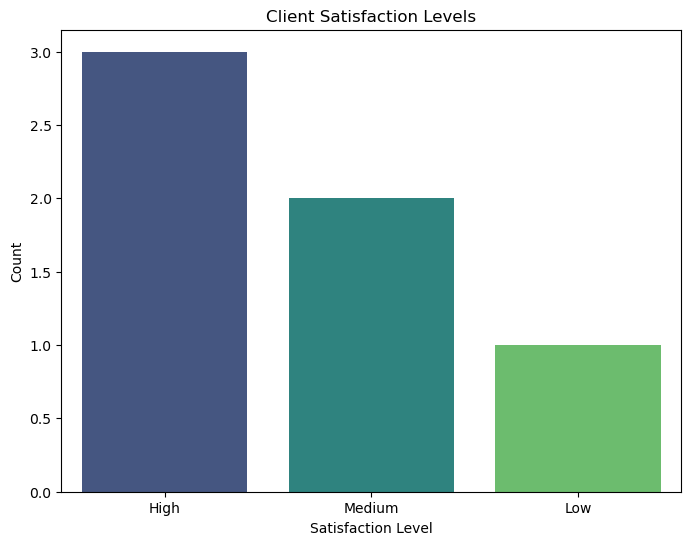

In [6]:
#Step 3:Investigate client perceptions and attitude
# Quantitative Data for Objective 2
data_perceptions = {
    'Country': ['Kuwait', 'Kuwait', 'Qatar', 'Qatar', 'UAE', 'UAE'],
    'Client Role': ['Government', 'Private Entity', 'Government', 'Individual', 'Private Entity', 'Individual'],
    'Satisfaction Level': ['High', 'Medium', 'Low', 'Medium', 'High', 'High'],
    'Trust Level': ['Medium', 'High', 'Low', 'Medium', 'High', 'High'],
    'Perceived Professionalism': [4, 3, 2, 3, 4, 5],
    'Technology Integration Importance': [5, 4, 3, 3, 5, 4]
}

# Create DataFrame
df_client_perceptions = pd.DataFrame(data_perceptions)

# Descriptive Statistics
print("=== Descriptive Statistics ===")
satisfaction_counts = df_client_perceptions['Satisfaction Level'].value_counts(normalize=True) * 100
print("Satisfaction Levels (%)\n", satisfaction_counts)

# Cross-Tabulation
cross_tab = pd.crosstab(df_client_perceptions['Country'], df_client_perceptions['Satisfaction Level'])
print("\nCross-Tabulation: Satisfaction Level by Country\n", cross_tab)

# Correlation Analysis
correlation = df_client_perceptions[['Perceived Professionalism', 'Technology Integration Importance']].corr()
print("\nCorrelation Matrix\n", correlation)

# Visualize Satisfaction Levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction Level', data=df_client_perceptions, palette='viridis')
plt.title('Client Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()



=== Thematic Analysis Results ===
Respondent: Interviewee 1
 - Trust Factors: 1 mentions
 - Compliance Issues: 1 mentions
 - Technology Integration: 2 mentions
 - Service Quality: 2 mentions
Respondent: Interviewee 2
 - Compliance Issues: 2 mentions
 - Service Quality: 1 mentions
Respondent: Interviewee 3
 - Trust Factors: 2 mentions
 - Technology Integration: 1 mentions
Respondent: Focus Group 1
 - Compliance Issues: 1 mentions
 - Technology Integration: 2 mentions
 - Service Quality: 2 mentions
Respondent: Focus Group 2
 - Trust Factors: 2 mentions
 - Compliance Issues: 2 mentions
 - Service Quality: 2 mentions


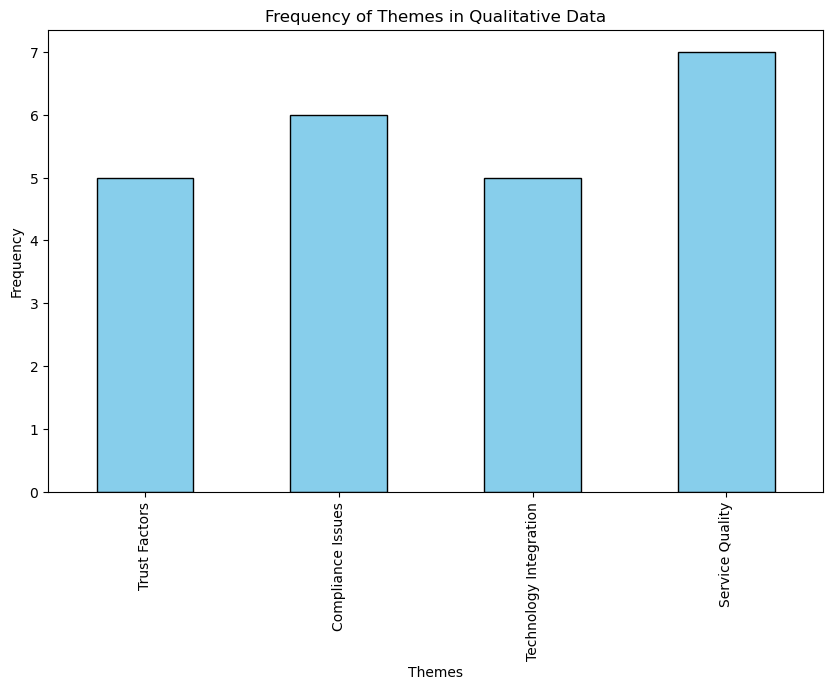

In [8]:
#Step 4: Assess challenges faced by security companies
# Qualitative Data for Objective 3
qualitative_data = {
    'Respondent': ['Interviewee 1', 'Interviewee 2', 'Interviewee 3', 'Focus Group 1', 'Focus Group 2'],
    'Transcript': [
        "We face significant challenges in maintaining client trust due to high competition and compliance costs. Our company needs better technology integration to enhance our service quality.",
        "The compliance issues are very tough, especially with different regulations across countries. However, our clients appreciate our professionalism despite these challenges.",
        "There is a lack of trust due to frequent changes in policies and poor communication. Investing in better technology could help regain client confidence.",
        "Participants discussed the importance of advanced surveillance and cybersecurity technologies for improving service quality, but they were concerned about the cost and regulatory compliance.",
        "Trust and transparency were major concerns, especially for new clients. Compliance with local laws and adopting new technologies were highlighted as critical for service improvement."
    ]
}

# Create DataFrame for Qualitative Data
df_qualitative = pd.DataFrame(qualitative_data)

# Data Preprocessing - Tokenization and Stop Words Removal
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Apply preprocessing to each transcript
df_qualitative['Processed Text'] = df_qualitative['Transcript'].apply(preprocess_text)

# Identify Themes using Keyword Frequency Analysis
themes = {
    'Trust Factors': ['trust', 'confidence', 'transparency'],
    'Compliance Issues': ['compliance', 'regulations', 'laws'],
    'Technology Integration': ['technology', 'integration', 'cybersecurity', 'surveillance'],
    'Service Quality': ['service', 'quality', 'professionalism', 'improvement']
}

def count_theme_keywords(processed_text, theme_keywords):
    return sum(word in theme_keywords for word in processed_text)

for theme, keywords in themes.items():
    df_qualitative[theme] = df_qualitative['Processed Text'].apply(lambda x: count_theme_keywords(x, keywords))

# Generate Actionable Insights
print("\n=== Thematic Analysis Results ===")
for index, row in df_qualitative.iterrows():
    print(f"Respondent: {row['Respondent']}")
    for theme in themes.keys():
        if row[theme] > 0:
            print(f" - {theme}: {row[theme]} mentions")

# Visualize Themes Frequency
theme_counts = df_qualitative[themes.keys()].sum()
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Themes in Qualitative Data')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.show()


In [10]:
#Step 5:Combined insights and recommendations
# Insights and Recommendations Based on Objective Analysis
print("\n=== Insights and Recommendations ===")
if theme_counts['Trust Factors'] > theme_counts['Technology Integration']:
    print("Insight: Trust factors are mentioned more frequently. Recommendation: Focus on building trust through transparency and improved communication.")
if theme_counts['Technology Integration'] > theme_counts['Compliance Issues']:
    print("Insight: Technology integration is a critical factor. Recommendation: Invest in advanced surveillance and cybersecurity technologies.")
if theme_counts['Service Quality'] > theme_counts['Trust Factors']:
    print("Insight: Service quality is a primary concern. Recommendation: Enhance service quality through regular training and adopting best practices.")



=== Insights and Recommendations ===
Insight: Service quality is a primary concern. Recommendation: Enhance service quality through regular training and adopting best practices.
